Tensor Flow model structure for a basic regression problem:

In [20]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import History

In [8]:
number_of_datapoints = 100
# generate random x values in the range -5 to +5
x = np.random.uniform(low = -5 , high = 5 , size = (number_of_datapoints, 1))
x.shape

(100, 1)

In [9]:
x[:5,:].round(2)

array([[-0.73],
       [ 2.39],
       [-1.03],
       [-2.65],
       [-3.51]])

In [12]:
y = np.random.uniform(-5 , 5 , size = (number_of_datapoints , 1))
z = 7 * x + 6 * y + 5

In [30]:
noise = np.random.uniform(low =-1 , high =1, size = (number_of_datapoints, 1))
z = 7 * x + 6 * y + 5 + noise
z.shape

(100, 1)

In [31]:
input = np.column_stack((x,y))
input.shape

(100, 2)

***Defining Neural Network***

In [32]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=input.shape)])

**Compiling Model**
<br>
To train a model, we first need to define a learning process. The model
compilation is a way of setting up its learning process. The learning process itself consists of a few components:
*   Objective loss function
*   Optimizer
*   Metrics

In [33]:
model.compile(optimizer = 'sgd',  loss = 'mean_squared_error', metrics = ['mse'] )
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100, 1)            3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [34]:
history = History()

In [37]:
model.fit(input, z, epochs = 100, verbose = 1, validation_split = 0.2, callbacks = [history])

Epoch 1/100
3/3 [==============================] - 0s 42ms/step - loss: 0.4674 - mse: 0.4674 - val_loss: 0.4303 - val_mse: 0.4303
Epoch 2/100
3/3 [==============================] - 0s 18ms/step - loss: 0.4525 - mse: 0.4525 - val_loss: 0.4139 - val_mse: 0.4139
Epoch 3/100
3/3 [==============================] - 0s 18ms/step - loss: 0.4375 - mse: 0.4375 - val_loss: 0.3955 - val_mse: 0.3955
Epoch 4/100
3/3 [==============================] - 0s 18ms/step - loss: 0.4240 - mse: 0.4240 - val_loss: 0.3829 - val_mse: 0.3829
Epoch 5/100
3/3 [==============================] - 0s 17ms/step - loss: 0.4056 - mse: 0.4056 - val_loss: 0.3760 - val_mse: 0.3760
Epoch 6/100
3/3 [==============================] - 0s 19ms/step - loss: 0.3962 - mse: 0.3962 - val_loss: 0.3537 - val_mse: 0.3537
Epoch 7/100
3/3 [==============================] - 0s 19ms/step - loss: 0.3863 - mse: 0.3863 - val_loss: 0.3493 - val_mse: 0.3493
Epoch 8/100
3/3 [==============================] - 0s 18ms/step - loss: 0.3804 - mse: 0.38

In [38]:
print(history.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


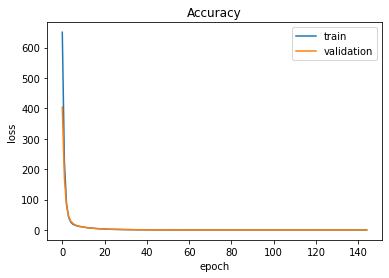

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

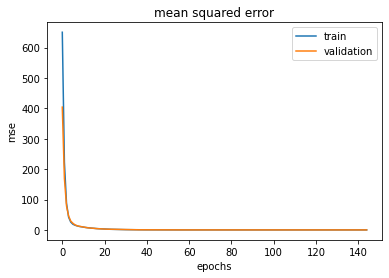

In [41]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('mean squared error')
plt.ylabel('mse')
plt.xlabel('epochs')
plt.legend(['train' , 'validation'] , loc = 'upper right')
plt.show()

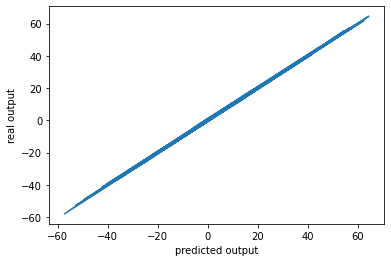

In [42]:
plt.plot(np.squeeze(model.predict_on_batch(input)),
np.squeeze(z))
plt.xlabel('predicted output')
plt.ylabel('real output')
plt.show()

In [44]:
print("Predicted z for x=2, y=3 ---> ", model.predict([[2,3]]).round(2))
print("Expected output: ", 7*2 + 6*3 + 5)

Predicted z for x=2, y=3 --->  [[36.83]]
Expected output:  37


---

**Binary Classification in TensorFlow**

In [ ]:
import tensorflow as tf
from tensorflow import keras
#loading data
import pandas as pd
#scaling feature values
from sklearn.preprocessing import StandardScaler
#encoding target values
from sklearn.preprocessing import LabelEncoder
#shuffling data
from sklearn.utils import shuffle
#splitting the dataset into training and validation
from sklearn.model_selection import train_test_split
#plotting curves
import matplotlib.pyplot as plt